In [3]:
#tsne
import  matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
species = iris.target_names

In [7]:
df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['Species'] = pd.Categorical.from_codes(y, species)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df.shape

(150, 5)

In [14]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [17]:
df[feature_names].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df[feature_names].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#tsne
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 0)
X_tsne = tsne.fit_transform(X_scaled)

<Figure size 1000x800 with 0 Axes>

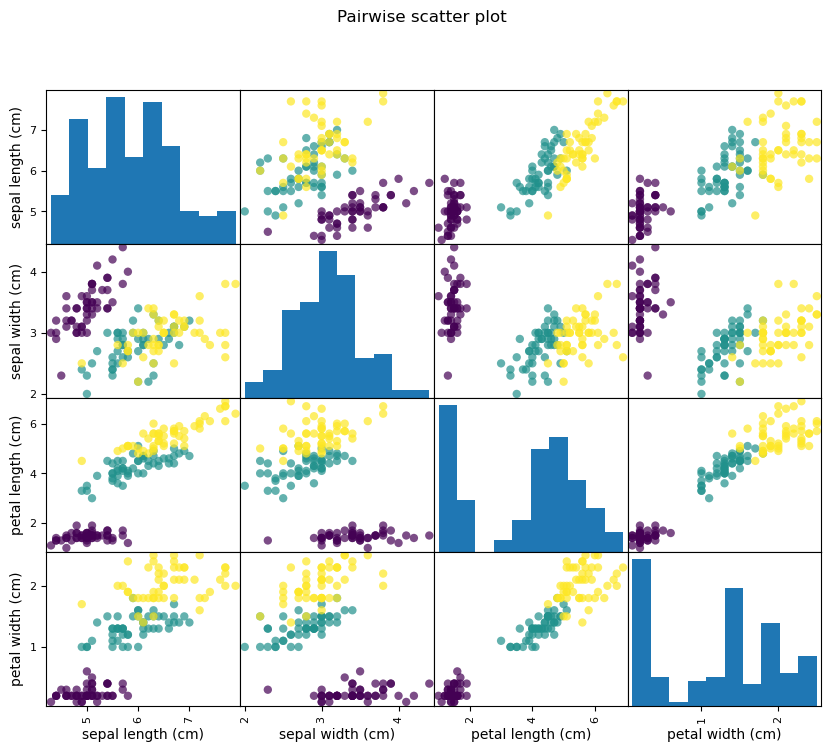

In [22]:
#before tsne
plt.figure(figsize = (10,8))
pd.plotting.scatter_matrix(df[feature_names], c = y, figsize = (10,8), diagonal='hist', alpha=0.7, marker = 'o')
plt.suptitle('Pairwise scatter plot')
plt.show()

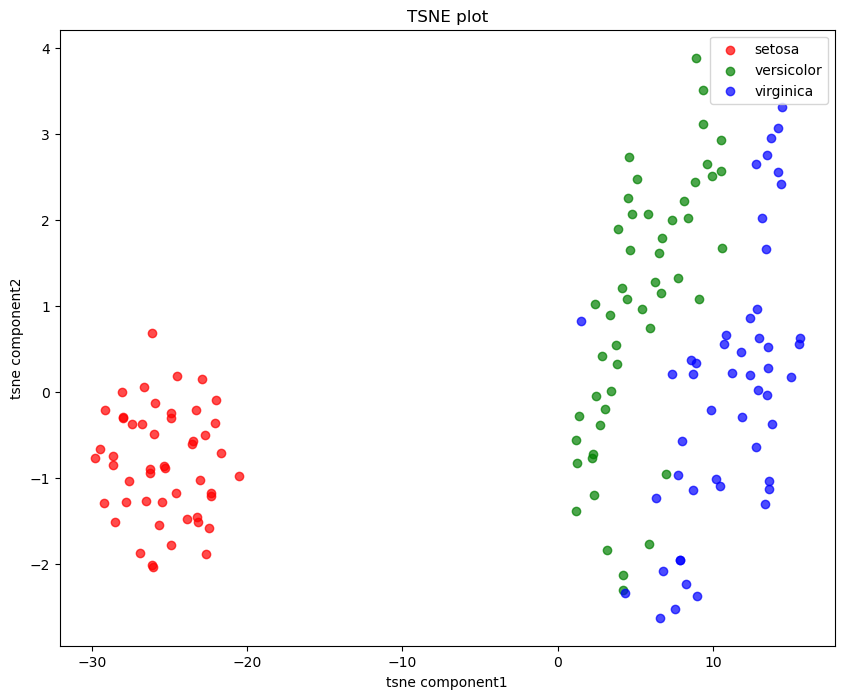

In [23]:
plt.figure(figsize = (10,8))
colors = ['red', 'green', 'blue']
for i, colors in enumerate(colors):
    plt.scatter(X_tsne[y==i, 0], X_tsne[y==i, 1], c = colors, label = species[i], alpha = 0.7)
plt.title('TSNE plot')
plt.xlabel('tsne component1')
plt.ylabel('tsne component2')
plt.legend()
plt.show()